In [27]:
#Importing Necessary packages:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [28]:
# A dictionary of 23 'companies_dict' is defined where 'key' is company's name 
#and 'value' is company's stock code. 
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [29]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
#Stock market data is extracted from yahoo finance for two years (2020 and 2021).
#The stock movement of companies would be compared based on these 6 parameters 
#:- 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'.
#data_source = 'yahoo' # Source of data is yahoo finance.
import yfinance as yf
start_date = '2018-01-01'
end_date = '2020-12-31'
df = yf.download(list(companies_dict.values()),start_date,end_date)
companies_dict.values()

[*********************100%***********************]  23 of 23 completed


dict_values(['AMZN', 'AAPL', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'XOM', 'CVX', 'VLO', 'F', 'BAC'])

In [31]:
#Numpy arrays are more convenient. So 'stock_open' and 'stock_close' are defined as follows :-
import numpy as np
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [32]:
#'movement' is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) 
#and negative movement suggests to short the stock(sell).
movements = stock_close-stock_open

In [33]:
sum_of_movement = np.sum(movements,1)

In [34]:
#The company and its 'sum_of_movement' is printed:
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:42.21243667602539
company:AMZN, Change:-496.99072265625
company:AXP, Change:-21.719863891601562
company:BA, Change:-215.66024017333984
company:BAC, Change:-1.1444091796875e-05
company:CVX, Change:-72.69991302490234
company:F, Change:-10.190017700195312
company:GE, Change:-107.85529708862305
company:HMC, Change:-12.370016098022461
company:IBM, Change:-34.95207214355469
company:INTC, Change:16.179946899414062
company:JNJ, Change:-24.070030212402344
company:KO, Change:-12.020011901855469
company:LMT, Change:-138.16949462890625
company:MA, Change:0.1504669189453125
company:MCD, Change:-11.119796752929688
company:MSFT, Change:17.249923706054688
company:NOC, Change:-101.31002807617188
company:PEP, Change:1.4701309204101562
company:TM, Change:-45.539878845214844
company:TXN, Change:31.530014038085938
company:VLO, Change:-69.66995620727539
company:XOM, Change:-51.59001922607422


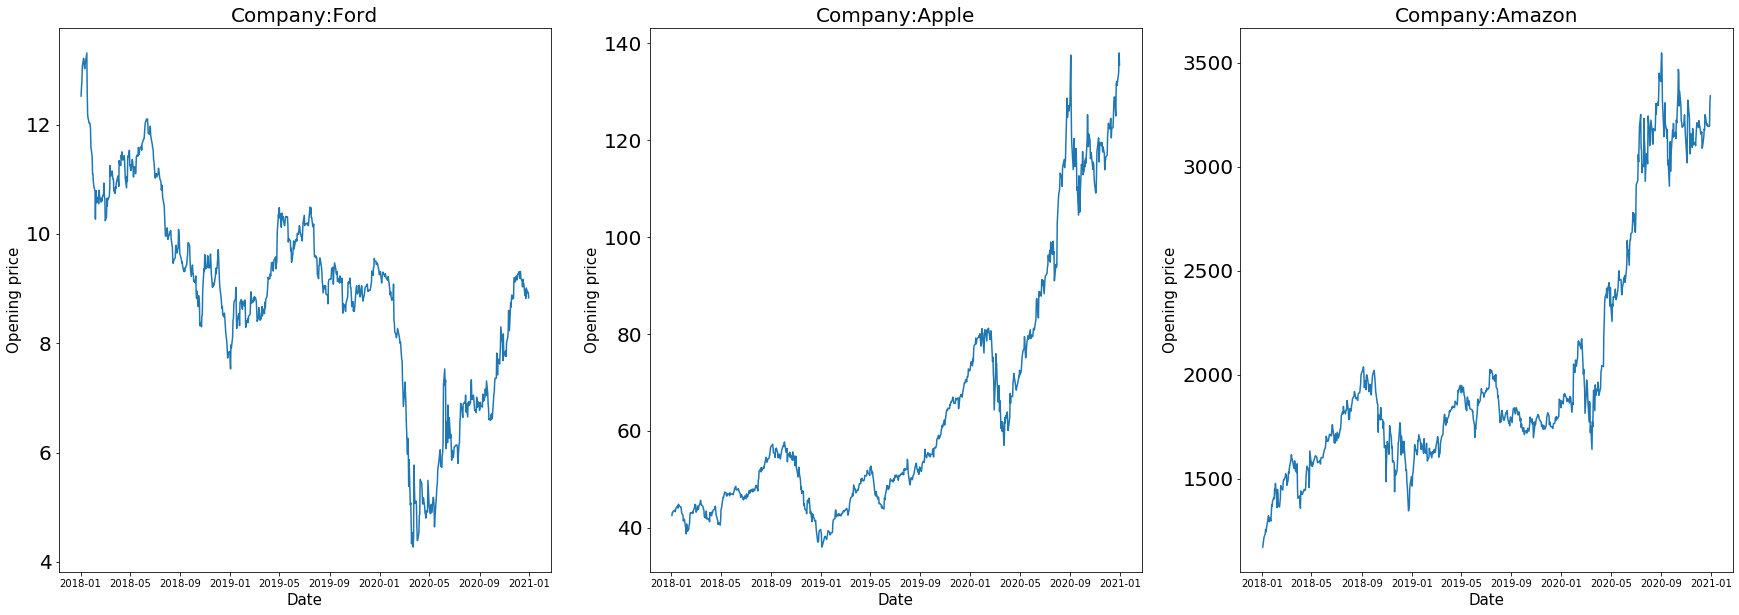

In [35]:
#Why Normalization:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10)) 
plt.subplot(1,3,1) 
plt.title('Company:Ford',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['F'])
plt.subplot(1,3,2) 
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])
plt.subplot(1,3,3) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])

In [36]:
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform
print(norm_movements)

[[ 0.01589786 -0.00227116  0.00370956 ...  0.08176068 -0.09629626
  -0.05632411]
 [ 0.01718935  0.01606754  0.00463836 ...  0.09090844  0.01218721
  -0.05573137]
 [-0.01760035  0.00690657  0.01826869 ...  0.0069064  -0.02450676
   0.02628911]
 ...
 [ 0.00939073  0.05205746 -0.00387884 ... -0.04674945 -0.01592373
   0.01653583]
 [ 0.01381922  0.01608463  0.00407763 ... -0.02582605  0.0009062
   0.02514644]
 [ 0.05067269  0.06449229  0.0012563  ...  0.00209404 -0.0322463
   0.011307  ]]


In [37]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 12):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=10).fit(norm_movements)
    labels=kmeans.predict(norm_movements)
    #if k == 3: labels = kmeans.labels_
    #clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(norm_movements,labels)

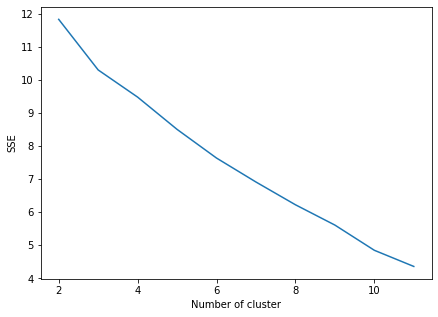

In [38]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [39]:
# Import the necessary packages
from sklearn.cluster import KMeans
# Create Kmeans model
kmeans = KMeans(n_clusters = 7,max_iter = 10000)
#Fit and Predicts:
kmeans.fit(norm_movements)
labels = kmeans.predict(norm_movements)

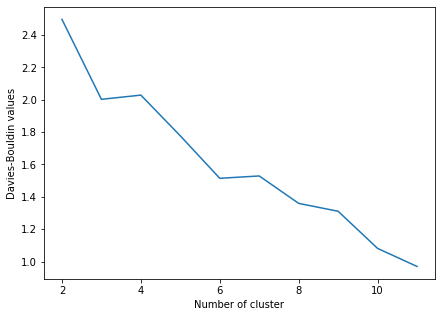

In [40]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [41]:
import pandas as pd
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)
print(df1)

    labels          companies
0        0             Amazon
1        0              Apple
20       0      Valero Energy
16       0             Toyota
14       0          Coca Cola
10       0          Microsoft
21       1               Ford
22       1    Bank of America
5        1          McDonalds
2        1   Northrop Grumman
12       2   American Express
18       2              Exxon
11       2  General Electrics
15       3  Johnson & Johnson
7        4                IBM
8        5  Texas Instruments
9        5         MasterCard
6        5              Intel
4        5    Lockheed Martin
3        5             Boeing
19       5            Chevron
13       6              Pepsi
17       6              Honda


In [42]:
from sklearn.decomposition import PCA
# Reduce the data
X = PCA(n_components = 2).fit_transform(norm_movements)
print(X)


[[-0.4065567   0.39889869]
 [-0.42642859  0.49868943]
 [ 0.28590449  0.05077627]
 [ 0.20189138  0.00831999]
 [ 0.31506992  0.08038946]
 [ 0.4254455   0.08609143]
 [ 0.45800373  0.04125971]
 [ 0.37936582 -0.06815479]
 [ 0.14725782  0.04181447]
 [ 0.05989437 -0.07404378]
 [-0.2302665   0.19712898]
 [-0.24412639 -0.38547961]
 [-0.15537948 -0.45752752]
 [-0.20243278 -0.45654678]
 [-0.19515813  0.19890893]
 [-0.09891405 -0.09122579]
 [-0.44493289  0.33006037]
 [-0.21105921 -0.46003079]
 [-0.36507269 -0.39486238]
 [ 0.05652925  0.02423501]
 [-0.20173454  0.25192762]
 [ 0.4095838   0.14723739]
 [ 0.44311586  0.03213369]]


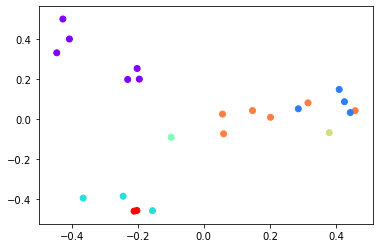

In [43]:
plt.scatter(X[:,0],X[:,1], c=labels, cmap='rainbow')

In [44]:
# Import the necessary packages
from sklearn.cluster import KMeans
# Create Kmeans model
kmeans = KMeans(n_clusters = 7,max_iter = 10000)
#Fit and Predicts:
kmeans.fit(X)
labels = kmeans.predict(X)

In [45]:
import pandas as pd
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)
print(df1)

    labels          companies
2        0   Northrop Grumman
4        0    Lockheed Martin
7        0                IBM
15       1  Johnson & Johnson
0        2             Amazon
1        2              Apple
16       2             Toyota
18       3              Exxon
17       3              Honda
13       3              Pepsi
12       3   American Express
11       3  General Electrics
10       4          Microsoft
14       4          Coca Cola
20       4      Valero Energy
6        5              Intel
5        5          McDonalds
21       5               Ford
22       5    Bank of America
9        6         MasterCard
8        6  Texas Instruments
3        6             Boeing
19       6            Chevron
